In [1]:
# importing
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans




# Assignment #0

In [2]:
# create data set of different number of gaussian groups in different dimension with different means and different covariance matrices. each one should have its own samples and labels

def generate_gaussian_groups(n_groups, n_samples, dim, priors=None, means=None, covs=None):
    if priors is None:
        priors = np.random.dirichlet(np.ones(n_groups))  # Generate random priors if not specified
    assert len(priors) == n_groups, "Number of priors must match the number of groups"
    assert np.isclose(sum(priors), 1), "Priors must sum to 1"

    datasets = []
    for i in range(n_groups):
        if means is not None:
            assert len(means) == n_groups, "Number of means must match the number of groups"
            assert len(means[i]) == dim, "Dimension of means must match the dimension of the data"
            mean = means[i]
        else:
            mean = np.random.uniform(-10, 10, dim)
        if covs is not None:
            assert len(covs) == n_groups, "Number of covariances must match the number of groups"
            assert covs[i].shape == (dim, dim), "Dimension of covariance must match the dimension of the data"
            cov = covs[i]
        else:
            cov = make_spd_matrix(dim)
        samples = int(priors[i] * n_samples)
        data = np.random.multivariate_normal(mean, cov, samples)
        labels = np.full(samples, i)
        df = pd.DataFrame(data, columns=[f'feature_{j}' for j in range(dim)])
        df['label'] = labels
        datasets.append(df)
    # reorder the dataframe with random order
    datasets = pd.concat(datasets).sample(frac=1).reset_index(drop=True) # shuffle rows
    return datasets

def plot_gaussian_groups(datasets):
    fig = plt.figure(figsize=(10,7))
    if len(datasets.shape) == 2:
        ax = fig.add_subplot()
        ax.scatter(datasets['feature_0'], datasets['feature_1'], c=datasets['label'], s=50, cmap='viridis')
        ax.set_xlabel('feature_0')
        ax.set_ylabel('feature_1')
    else:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(datasets['feature_0'], datasets['feature_1'], datasets['feature_2'], c=datasets['label'], s=50, cmap='viridis')
        ax.set_xlabel('feature_0')
        ax.set_ylabel('feature_1')
        ax.set_zlabel('feature_2')
    fig.suptitle('Gaussian Groups (only first features)')
    plt.show()


#### Generate random gaussians

sample data random:
   feature_0  feature_1  label
0   3.759308  -9.371108      3
1   5.653606  -3.797081      2
2  -2.427034   0.023919      1
3  -6.911889   0.000941      1
4   6.299763  -4.497497      2


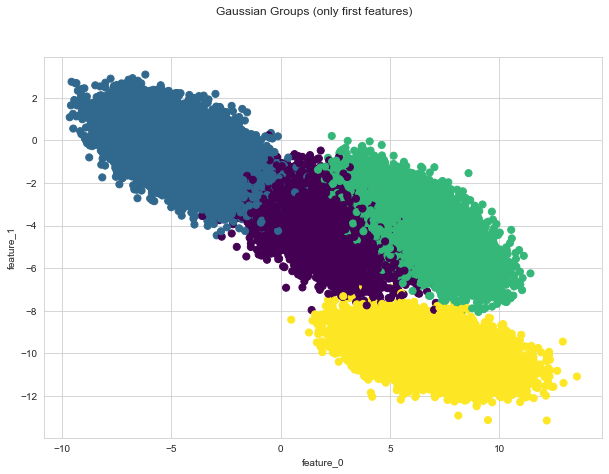

In [22]:
# Example usage:
n_samples = 100000
dim = 2
priors = [.1, .4, .2, .3]
n_groups = len(priors)
dataset_random = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors)

print("sample data random:")
print(dataset_random.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_random)

# Save the DataFrame to a CSV file
dataset_random.to_csv('dataset_random.csv', index=False)


#### Generate square gaussians


sample data random:
   feature_0  feature_1  label
0   2.466314  -9.368629      3
1   9.754207   1.808841      1
2 -10.904562   3.381829      0
3  10.792223   1.943182      1
4   9.106273   3.970100      1


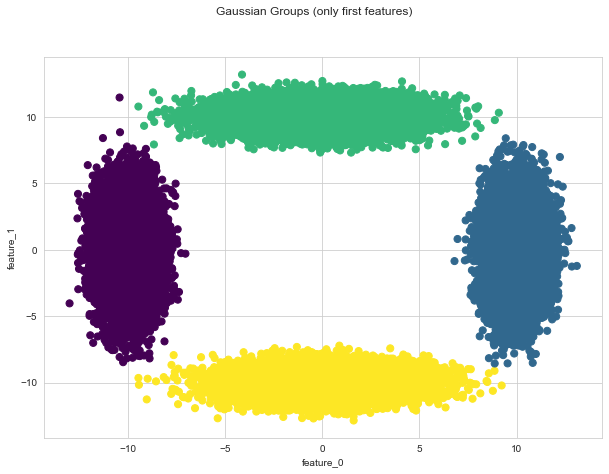

In [4]:
# Example usage:
n_samples = 100000
dim = 2
priors = [.25, .25, .25, .25]
n_groups = len(priors)
dataset_square = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors,
                                   means=[np.array([-10, 0]), np.array([10, 0]), np.array([0, 10]), np.array([0, -10])],
                                   covs=[np.array([[0.5, 0], [0, 5]]), np.array([[0.5, 0], [0, 5]]), np.array([[5, 0], [0, 0.5]]), np.array([[5, 0],[0,.5]])])

print("sample data random:")
print(dataset_square.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_square)

# Save the DataFrame to a CSV file
dataset_square.to_csv('dataset_square.csv', index=False)


#### Generate traingle gaussians


sample data triangle:
   feature_0  feature_1  label
0  13.277082  -1.305236      1
1  -7.102467  -6.901082      0
2   8.539768  -5.615036      1
3   0.518831   5.437602      2
4  12.993419  -1.382247      1


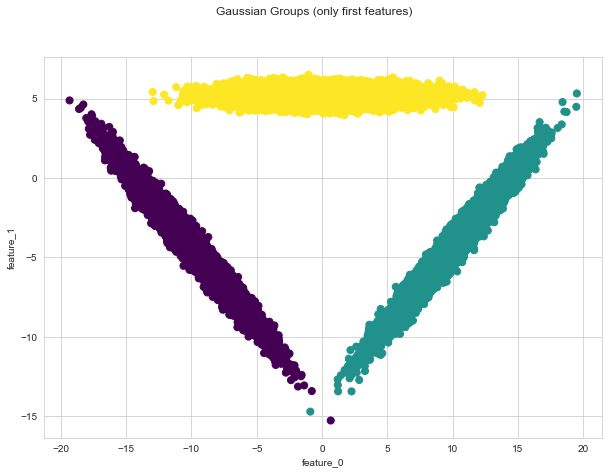

In [5]:
# Triangle
n_samples = 100000
dim = 2
priors = [1/3, 1/3, 1/3]
n_groups = len(priors)
dataset_triangle = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors,
                                   means=[np.array([-10, -np.sqrt(75)/2]), np.array([10, -np.sqrt(75)/2]), np.array([0, 3*np.sqrt(3)])],
                                   covs=[np.array([[ 5.05, -4.95], [-4.95,  5.05]]), np.array([[ 5.05, 4.95], [4.95,  5.05]]), np.array([[10, 0], [0, 0.1]])])

print("sample data triangle:")
print(dataset_triangle.head())

# plot each group and color it differently
plot_gaussian_groups(dataset_triangle)

# Save the DataFrame to a CSV file
dataset_triangle.to_csv('dataset_triangle.csv', index=False)


#### Generate lines gaussians


Sample data lines:
   feature_0  feature_1  label
0   3.853381   1.741729      5
1  -0.290044  -1.182863      0
2   4.191853   1.556919      5
3   3.154258   1.566444      5
4   2.173721   4.151024      4


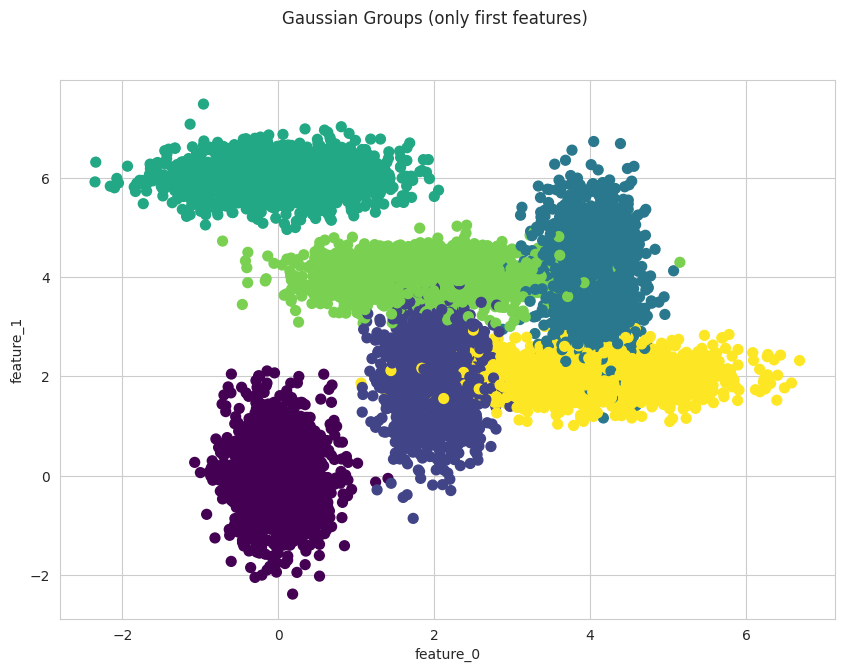

In [33]:
# Two lines with three Gaussians each
n_samples = 10000
dim = 2
priors = [1/6]*6  # Six Gaussians in total
n_groups = len(priors)

# Define the means along two lines
means = [np.array([2*i, 2*i]) for i in range(3)] + [np.array([2*i, 6-2*i]) for i in range(3)]

# Define the covariance matrices
# We can make the clusters more elongated along the lines by making one of the eigenvalues much larger than the other.
covs = [np.array([[0.1, 0], [0, 0.5+i/10]]) for i in range(3)] + [np.array([[0.5+i/10, 0], [0, 0.1]]) for i in range(3)]

# Generate the Gaussian groups
dataset_lines = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors, means=means, covs=covs)

print("Sample data lines:")
print(dataset_lines.head())

# Plot each group and color it differently
plot_gaussian_groups(dataset_lines)

# Save the DataFrame to a CSV file
dataset_lines.to_csv('dataset_lines.csv', index=False)


#### Generate star gaussians

Sample data star:
   feature_0  feature_1  label
0   1.306376   4.692610      1
1  -6.489446   4.540788      2
2   3.870145 -12.171625      4
3   7.488709   0.124124      0
4  -9.485116  -6.528929      3


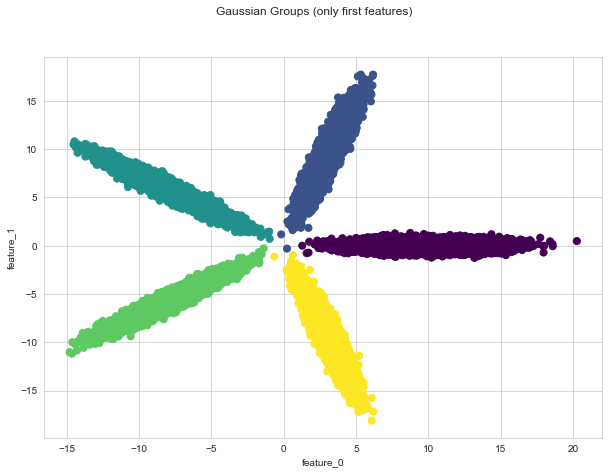

In [7]:
# Star
n_samples = 100000
dim = 2
priors = [0.2, 0.2, 0.2, 0.2, 0.2]
n_groups = len(priors)

# Define the means
means = [np.array([np.cos(2*np.pi*i/5), np.sin(2*np.pi*i/5)])*10 for i in range(5)]

# Define the covariance matrices
# We can use a similar approach to the rotated covariance matrices for the triangle,
# but with different rotation angles for each cluster to align them with the rays of the star.
covs = []
for i in range(5):
    theta = np.radians(i*72+90)  # Rotate each covariance matrix by a different angle
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    cov = np.array([[0.1, 0], [0, 5]])  # Make the clusters elongated along the rays of the star
    cov_rotated = R @ cov @ R.T
    covs.append(cov_rotated)

# Generate the Gaussian groups
dataset_star = generate_gaussian_groups(n_groups, n_samples, dim, priors=priors, means=means, covs=covs)

print("Sample data star:")
print(dataset_star.head())

# Plot each group and color it differently
plot_gaussian_groups(dataset_star)

# Save the DataFrame to a CSV file
dataset_star.to_csv('dataset_star.csv', index=False)


# Assignment #1

### Creating the algorithm of EM for GMM

In [3]:
class GMM:
    def __init__(self, n_components, n_init=1, init_method='random'):
        self.K = n_components  # Number of Gaussian components
        self.n_init = n_init  # Number of times the algorithm will be run with different initializations
        self.init_method = init_method


    def initialize(self, X, i=1, ):
        n_samples, n_features = X.shape

        if self.init_method == 'kmeans':
            # Initialize means using k-means
            kmeans = KMeans(n_clusters=self.K, random_state=0).fit(dataset[dataset.columns.drop('label')])
            self.mu = kmeans.cluster_centers_
            print(f"Means are initialized with K-Means.")
        elif self.init_method == 'random':
            # Initialize means by randomly choosing data points
            indices = np.random.choice(n_samples, size=self.K, replace=False)
            self.mu = X[indices]
        else:
            raise ValueError(f"Unknown init_method: {self.init_method}")

        # Initialize covariances to be identity matrices
        self.Sigma = np.stack([np.eye(n_features) for _ in range(self.K)])

        # Initialize priors to be uniform probabilities
        self.weights = np.full(self.K, 1 / self.K)

        print(f"Intitialization #{i}: Initialized means, covariances and weights")

    def e_step(self, X):
        n_samples = X.shape[0]

        # Compute the likelihood
        likelihood = np.zeros((n_samples, self.K))
        for i in range(self.K):
            likelihood[:, i] = multivariate_normal.pdf(X, mean=self.mu[i], cov=self.Sigma[i])

        # Compute the responsibilities using Bayes' rule
        numerator = likelihood * self.weights
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        gamma = numerator / denominator          # responsibility = prior * likelihood / evidence

        return gamma

    def m_step(self, X, gamma):
        n_samples = X.shape[0]

        # Compute the total responsibility assigned to each component
        Nk = gamma.sum(axis=0)

        # Update the means
        self.mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]

        # Update the covariances
        for i in range(self.K):
            diff = X - self.mu[i]
            self.Sigma[i] = np.dot(gamma[:, i] * diff.T, diff) / Nk[i]

        # Update the weights
        self.weights = Nk / n_samples

    def fit(self, X, max_iter=1000):
        for init in range(1, 1+self.n_init):
            self.initialize(X, i=init)
            log_likelihood_old = None

            for i in tqdm(range(max_iter)):  # Maximum of 100 iterations
                # E-step
                gamma = self.e_step(X)

                # M-step
                self.m_step(X, gamma)

                # Compute the log-likelihood
                log_likelihood_new = np.sum(gamma * (np.log(self.weights) + self.log_likelihood(X)))
                if log_likelihood_old is not None and abs(log_likelihood_new - log_likelihood_old) < 1e-3:
                    print("Converged after {} iterations".format(i+1))
                    break
                log_likelihood_old = log_likelihood_new

    def log_likelihood(self, X):
        n_samples = X.shape[0]
        log_likelihood = np.zeros((n_samples, self.K))

        for i in range(self.K):
            log_likelihood[:, i] = multivariate_normal.logpdf(X, mean=self.mu[i], cov=self.Sigma[i])

        return log_likelihood

    def predict(self, X):
        # Perform the E-step with the learned parameters
        gamma = self.e_step(X)

        # Assign each data point to the component that gives it the highest responsibility
        labels = gamma.argmax(axis=1)

        return labels


### Creating the dataset

In [213]:
def split_dataset(dataset, test_size=0.2):
    # Split the dataset into training and testing sets
    if test_size:
        X_train, X_test, y_train, y_test = train_test_split(dataset.drop('label', axis=1), dataset['label'], test_size=test_size, random_state=42)
        return X_train.values, y_train.values, X_test.values, y_test.values
    else:
        X_train = dataset[dataset.columns.drop('label')]
        y_train = dataset['label']
        return X_train.values, y_train.values


### Fitting the model

In [5]:
train_predictions = {}
train_gt = {}

init_methods = ['random', 'kmeans']
datasets = ['random', 'triangle', 'square', 'lines', 'star']

for dataset_name in datasets:
    print('=' * 50)
    print("Working on dataset: ", dataset_name)
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    X_train, y_train = split_dataset(dataset, test_size=0)
    n_groups = len(set(y_train))
    train_predictions[dataset_name] = {}
    train_gt[dataset_name] = y_train
    for init_method in init_methods:  # number of times to fit the model
        gmm = GMM(n_components=n_groups, init_method=init_method)  # Reinitialize the GMM
        gmm.fit(X_train)
        y_train_pred = gmm.predict(X_train)
        train_predictions[dataset_name][init_method] = y_train_pred


Working on dataset:  random
Intitialization #1: Initialized means, covariances and weights


 29%|████████████████████████████████████████████████████████████████▌                                                                                                                                                               | 288/1000 [00:01<00:04, 160.87it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 289 iterations
Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


 16%|████████████████████████████████████▎                                                                                                                                                                                           | 162/1000 [00:01<00:05, 157.31it/s]


Converged after 163 iterations
Working on dataset:  triangle
Intitialization #1: Initialized means, covariances and weights


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.68it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|▉                                                                                                                                                                                                                                  | 4/1000 [00:00<00:48, 20.62it/s]

Converged after 5 iterations


Working on dataset:  square
Intitialization #1: Initialized means, covariances and weights


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.14it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|▋                                                                                                                                                                                                                                  | 3/1000 [00:00<00:55, 17.83it/s]

Converged after 4 iterations
Working on dataset:  lines


Intitialization #1: Initialized means, covariances and weights


  6%|████████████▉                                                                                                                                                                                                                     | 57/1000 [00:03<01:01, 15.31it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 58 iterations
Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  5%|███████████                                                                                                                                                                                                                       | 49/1000 [00:03<01:00, 15.59it/s]


Converged after 50 iterations
Working on dataset:  star
Intitialization #1: Initialized means, covariances and weights


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 835/1000 [00:46<00:09, 18.12it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 836 iterations
Means are initialized with K-Means.
Intitialization #1: Initialized means, covariances and weights


  0%|▍                                                                                                                                                                                                                                  | 2/1000 [00:00<01:26, 11.56it/s]

Converged after 3 iterations


### Visualizing the results

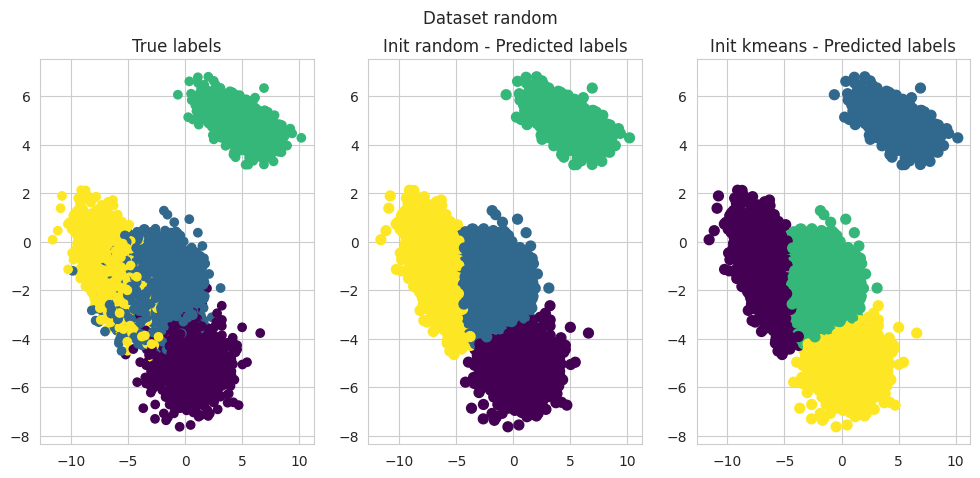

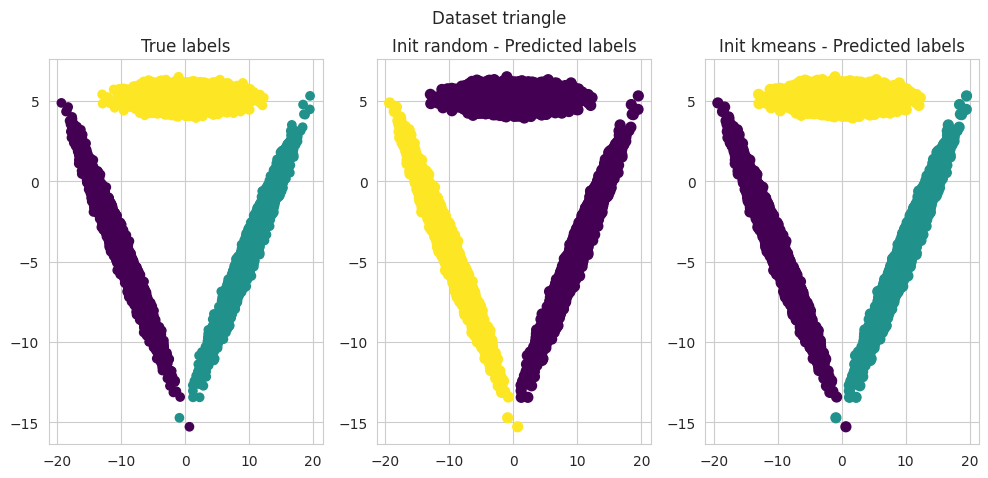

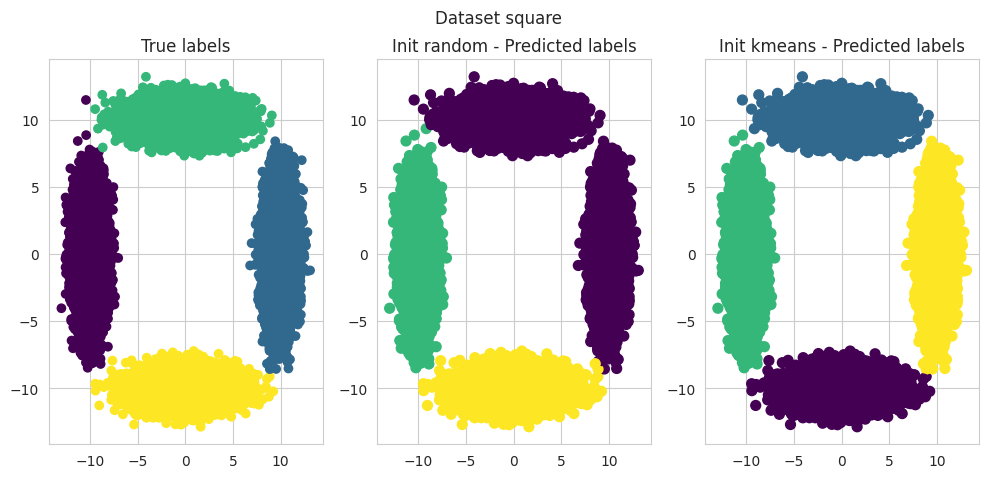

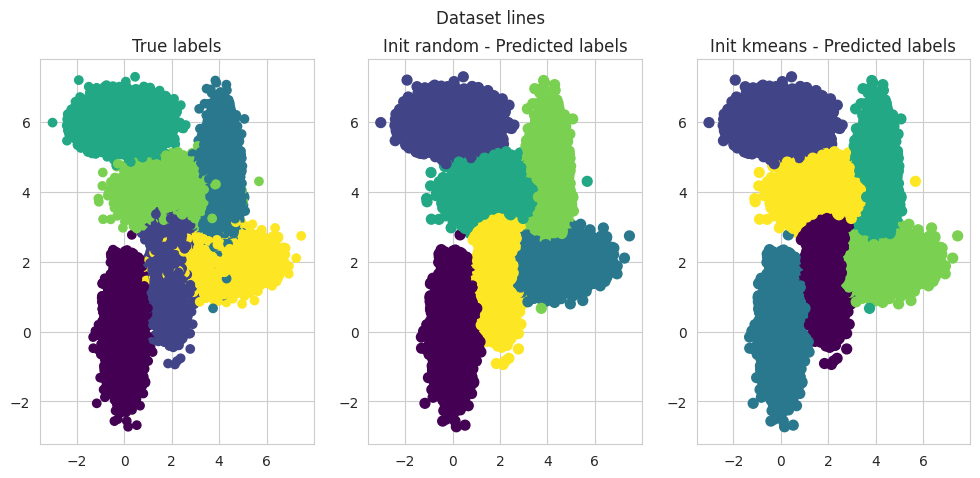

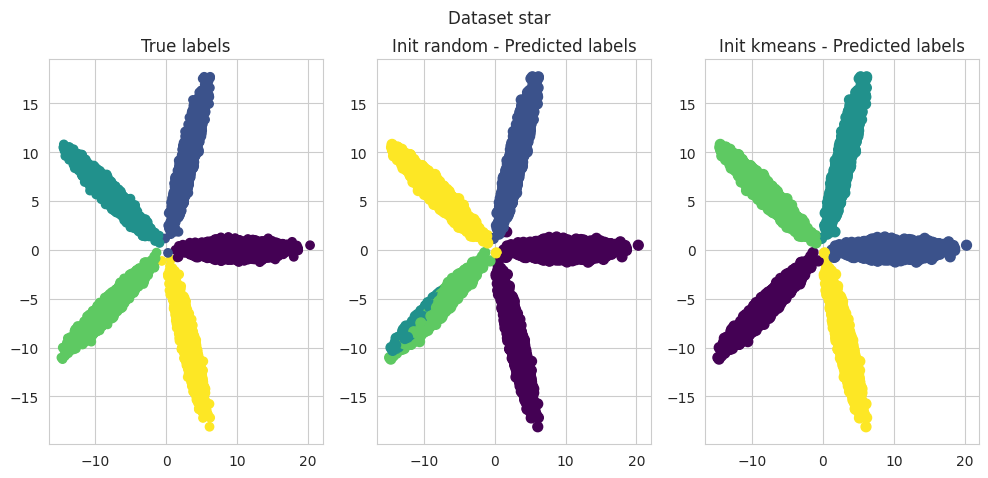

In [6]:
for dataset_name in train_predictions.keys():
    init_method = list(train_predictions[dataset_name].keys())
    fig, axs = plt.subplots(1, 1 + len(init_method), figsize=(12,5))
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    feat0 = dataset["feature_0"]
    feat1 = dataset["feature_1"]
    axs[0].scatter(feat0, feat1, c=train_gt[dataset_name], cmap='viridis')
    axs[0].set_title("True labels")
    for i, method in enumerate(init_method, 1):
        axs[i].scatter(feat0, feat1, c=train_predictions[dataset_name][method], s=50, cmap='viridis')
        axs[i].set_title(f"Init {method} - Predicted labels")
    fig.suptitle(f'Dataset {dataset_name}')
    plt.show()

### Evaluating the model

In [ ]:
def single_linkage(D_i, D_j):
    return np.min(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2))

def complete_linkage(D_i, D_j):
    return np.max(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2))

def average_linkage(D_i, D_j):
    n_i, n_j = len(D_i), len(D_j)
    return np.sum(np.linalg.norm(D_i[:, np.newaxis] - D_j, axis=2)) / (n_i * n_j)

def centroid_linkage(D_i, D_j):
    m_i, m_j = np.mean(D_i, axis=0), np.mean(D_j, axis=0)
    return np.linalg.norm(m_i - m_j)

def wards_method(D_i, D_j):
    n_i, n_j = len(D_i), len(D_j)
    m_i, m_j = np.mean(D_i, axis=0), np.mean(D_j, axis=0)
    return np.sqrt((n_i * n_j) / (n_i + n_j)) * np.linalg.norm(m_i - m_j)

#TODO: what is the last method?

In [28]:
# # Choosing y_pred values from the iteration we did:
# i = input("Choose an index of the prediction to use for the evaluation: ")
# y_test_pred = test_predictions[int(i)-1]
# fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test_pred, s=50, cmap='viridis')
# ax1.set_title(f'Predicted labels for GMM {i}')
# ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, s=50, cmap='viridis')
# ax2.set_title(f'Original Labels')
# plt.show()


In [29]:
# # Separate the data into clusters based on the true and predicted labels
# clusters_true = [X_test[y_test == i] for i in np.unique(y_test)]
# clusters_pred = [X_test[y_test_pred == i] for i in np.unique(y_test_pred)]
#
# # Make sure that the number of clusters is the same in the true and predicted labels
# assert len(clusters_true) == len(clusters_pred), "Number of clusters in y_test and y_pred must be the same"
#
# # Initialize the DataFrame
# distances_df = pd.DataFrame(columns=['Cluster Pair', 'Single Linkage', 'Complete Linkage', 'Average Linkage', 'Centroid Linkage', "Ward's Method"])
#
# # Calculate the distance between each pair of corresponding clusters
# for i in range(len(clusters_true)):
#     D_i_true = clusters_true[i]
#     D_j_pred = clusters_pred[i]
#
#     # Calculate the distances
#     single = single_linkage(D_i_true, D_j_pred)
#     complete = complete_linkage(D_i_true, D_j_pred)
#     average = average_linkage(D_i_true, D_j_pred)
#     centroid = centroid_linkage(D_i_true, D_j_pred)
#     ward = wards_method(D_i_true, D_j_pred)
#
#     # Add the results to the DataFrame
#     distances_df.loc[i] = [f"Cluster Pair {i+1}", single, complete, average, centroid, ward]

In [30]:
# distances_df

# Assignment #2

In [220]:
class UOFC:
    def __init__(self, n_clusters, init_method='random'):
        self.n_clusters = n_clusters
        self.init_method = init_method
        self.prototypes = None
        self.max_iter = 1000

    def _init_prototypes(self, data):
        if self.init_method == 'random':
            # Initialize prototypes randomly from the data points
            prototypes = data[np.random.choice(data.shape[0], self.n_clusters, replace=False), :]
        elif self.init_method == 'kmeans':
            # Initialize prototypes using K-means
            # initiate the prototypes with k-mean from sklearn:
            prototypes = KMeans(n_clusters=self.n_clusters, init='random', max_iter=1, n_init=1).fit(data).cluster_centers_
            # prototypes = self._kmeans(data)
        else:
            raise ValueError(f"Unknown init_method: {self.init_method}")
        return prototypes

    def _F_calculate(self, X, prototypes=None, memberships=None):
        if prototypes is None:
            prototypes = self.prototypes
        if memberships is None:
            memberships = self._memberships(X, prototypes)
        # Compute F for each data point and each cluster
        # Reshape X, prototypes, and memberships to allow broadcasting
        X_reshaped = X[:, None, :]
        prototypes_reshaped = prototypes[None, :, :]
        memberships_reshaped = memberships[:, :, None, None]

        # Compute the difference and outer product for each pair of data point and prototype
        diff = (prototypes_reshaped - X_reshaped)[:, :, :, None]
        F_k = diff @ diff.transpose(0, 1, 3, 2)

        # Compute the weighted sum of F_k for each cluster
        F = np.sum(memberships_reshaped * F_k, axis=0)

        # Compute the sum of memberships for each cluster
        sum_dominator_k = memberships.sum(axis=0)

        # Normalize F by the sum of memberships
        F /= sum_dominator_k[:, None, None]

        return F

    def _distances(self, X, prototypes=None, memberships=None):
        if prototypes is None:
            prototypes = self.prototypes
        if memberships is None:
            memberships = self._memberships(X, prototypes)
        F = self._F_calculate(X, prototypes, memberships)
        distances = np.zeros((self.n_clusters, X.shape[0]))
        for k in range(self.n_clusters):
            a_k = self._memberships(X)[:, k].sum()
            for i in range(X.shape[0]):
                distances[k, i] = ((np.linalg.det(F[k]) ** (1/2)) / a_k) * np.exp(
                    (prototypes[k] - X[i])[:, None].T @ (F[k] ** (-1)) @ (prototypes[k] - X[i])[:, None] / 2
                )
        return distances

    def _memberships(self, data, prototypes=None):
        if prototypes is None:
            prototypes = self.prototypes

        # Compute memberships for each data point to each cluster
        # Reshape data and prototypes to allow broadcasting
        data_reshaped = data[:, None, :]
        prototypes_reshaped = prototypes[None, :, :]

        # Compute the distance for each data point to each prototype
        diff = data_reshaped - prototypes_reshaped
        memberships = np.einsum('ijk,ijk->ij', diff, diff)  # equivalent to summing over the last axis of diff**2

        # Apply the same transformations as in the original function
        m = np.clip(1 / memberships, a_min=-1, a_max=100000)
        m = m / m.sum(axis=1)[:, None]
        return m

    def fit(self, data, max_iter=1000):
        self.max_iter = max_iter
        # Initialize classification prototypes
        self.prototypes = self._init_prototypes(data)

        for i in tqdm(range(self.max_iter)):
            # Step 1: Cluster data using fuzzy K-means with current prototypes
            # Compute memberships for each data point to each cluster
            memberships = self._memberships(data)

            # Step 2: Refine prototypes using fuzzy maximum likelihood estimation
            new_prototypes = np.dot(memberships.T ** 2, data) / (memberships ** 2).sum(axis=0, keepdims=True).T

            # Check for convergence
            if np.allclose(self.prototypes, new_prototypes, atol=1e-2, rtol=1e-2):
                break

            self.prototypes = new_prototypes

    def predict(self, data):
        # Assign each data point to the cluster with the highest membership
        distances = self._distances(data)
        return np.argmax(distances, axis=0)

    def fuzzy_hypercube_criteria(self, X):
        F = self._F_calculate(X)
        hv = np.sqrt(np.linalg.det(F)).sum(axis=0)
        return hv

    def partition_density_criteria(self, X):
        memberships = self._memberships(X)
        pd = memberships.sum(axis=0).sum(axis=0) / self.fuzzy_hypercube_criteria(X)
        return pd

    def average_partition_density_central_criteria(self, X):
        F = self._F_calculate(X)
        memberships = self._memberships(X)
        apd = (memberships.sum(axis=0) / np.sqrt(np.linalg.det(F))).mean(axis=0)
        return apd

    def average_partition_density_max_criteria(self, X):
        F = self._F_calculate(X)
        memberships = self._memberships(X)
        membership_max = []
        for k in range(self.n_clusters):
            argmax_indices = np.argmax(memberships, axis=1) == k
            membership_max.append(memberships[argmax_indices][:, k].sum(axis=0))
        membership_max = np.array(membership_max)
        apd = (membership_max / np.sqrt(np.linalg.det(F))).mean(axis=0)
        return apd

    def normalized_partition_criteria(self, X):
        memberships = self._memberships(X)
        distances = self._distances(X)
        return (memberships ** 2 * distances.T).sum()

### Fitting the model

In [221]:
train_predictions = {}
train_gt = {}

init_methods = ['random', 'kmeans']
datasets = ['lines'] # ['random', 'triangle', 'square', 'lines', 'star']
num_of_groups = [2, 3, 4, 5, 6, 7]

for dataset_name in datasets:
    print('=' * 50)
    print("Working on dataset: ", dataset_name)
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    X_train, y_train = split_dataset(dataset, test_size=0)

    train_predictions[dataset_name] = {method: {} for method in init_methods}
    train_gt[dataset_name] = y_train
    for init_method in init_methods:  # number of times to fit the model
        print('-'* 25)
        for n_groups in num_of_groups:  # number of clusters
            print("Fitting model with init_method: ", init_method, " and n_groups: ", n_groups)
            uofc = UOFC(n_clusters=n_groups, init_method=init_method)  # Initialize the UOFC
            uofc.fit(X_train)
            y_train_pred = uofc.predict(X_train)
            train_predictions[dataset_name][init_method][n_groups] = {'y_pred': y_train_pred, 'model': uofc}

Working on dataset:  lines
-------------------------
Fitting model with init_method:  random  and n_groups:  2


  0%|                                                                                                                                                                                                                                           | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_1606784/3870555299.py:76: RuntimeWarning: divide by zero encountered in divide
  m = np.clip(1 / memberships, a_min=-1, a_max=100000)
  0%|█▏                                                                                                                                                                                                                               | 5/1000 [00:00<00:00, 1226.98it/s]


Fitting model with init_method:  random  and n_groups:  3


  1%|██▏                                                                                                                                                                                                                             | 10/1000 [00:00<00:00, 1448.01it/s]


Fitting model with init_method:  random  and n_groups:  4


  1%|█▊                                                                                                                                                                                                                               | 8/1000 [00:00<00:00, 1143.95it/s]
/tmp/ipykernel_1606784/3870555299.py:57: RuntimeWarning: overflow encountered in exp
  distances[k, i] = ((np.linalg.det(F[k]) ** (1/2)) / a_k) * np.exp(


Fitting model with init_method:  random  and n_groups:  5


  2%|█████▏                                                                                                                                                                                                                          | 23/1000 [00:00<00:00, 1308.32it/s]


Fitting model with init_method:  random  and n_groups:  6


  1%|█▎                                                                                                                                                                                                                                | 6/1000 [00:00<00:01, 880.08it/s]


Fitting model with init_method:  random  and n_groups:  7


  1%|█▎                                                                                                                                                                                                                                | 6/1000 [00:00<00:01, 776.72it/s]


-------------------------
Fitting model with init_method:  kmeans  and n_groups:  2


  0%|▍                                                                                                                                                                                                                                | 2/1000 [00:00<00:00, 1052.13it/s]


Fitting model with init_method:  kmeans  and n_groups:  3


  1%|██                                                                                                                                                                                                                               | 9/1000 [00:00<00:00, 1268.52it/s]
/tmp/ipykernel_1606784/3870555299.py:57: RuntimeWarning: overflow encountered in exp
  distances[k, i] = ((np.linalg.det(F[k]) ** (1/2)) / a_k) * np.exp(


Fitting model with init_method:  kmeans  and n_groups:  4


  1%|██                                                                                                                                                                                                                               | 9/1000 [00:00<00:00, 1294.94it/s]


Fitting model with init_method:  kmeans  and n_groups:  5


  0%|█▏                                                                                                                                                                                                                                | 5/1000 [00:00<00:01, 860.37it/s]
/tmp/ipykernel_1606784/3870555299.py:57: RuntimeWarning: overflow encountered in exp
  distances[k, i] = ((np.linalg.det(F[k]) ** (1/2)) / a_k) * np.exp(


Fitting model with init_method:  kmeans  and n_groups:  6


  1%|█▎                                                                                                                                                                                                                                | 6/1000 [00:00<00:01, 810.02it/s]


Fitting model with init_method:  kmeans  and n_groups:  7


  0%|█▏                                                                                                                                                                                                                                | 5/1000 [00:00<00:01, 726.44it/s]


### Visualizing the results

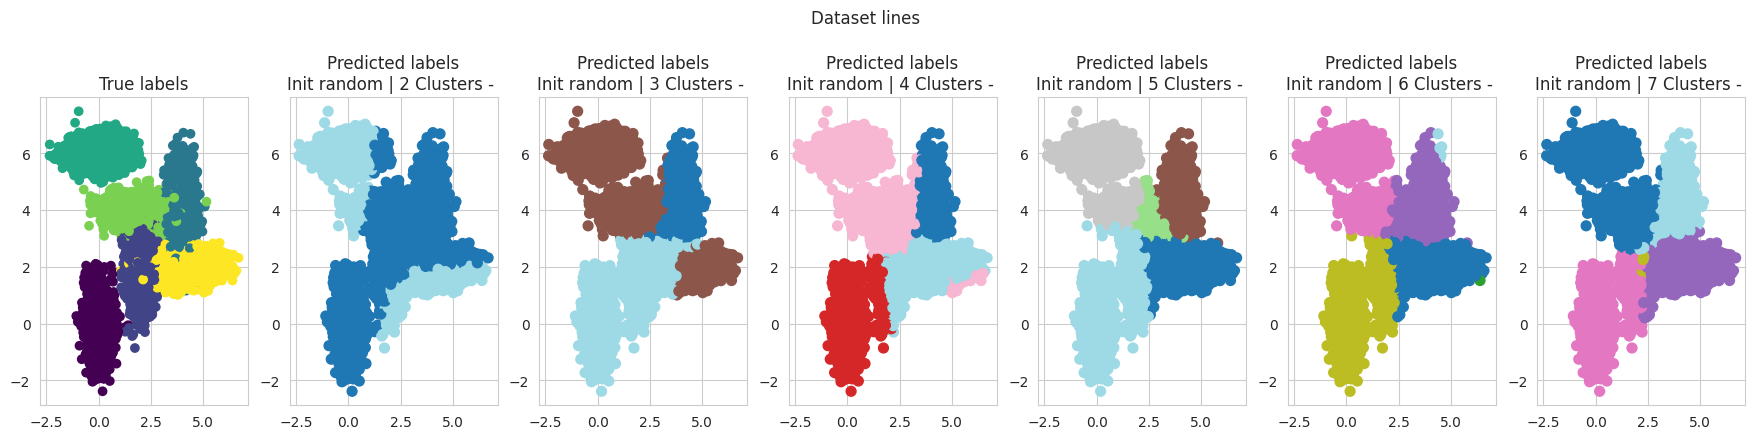

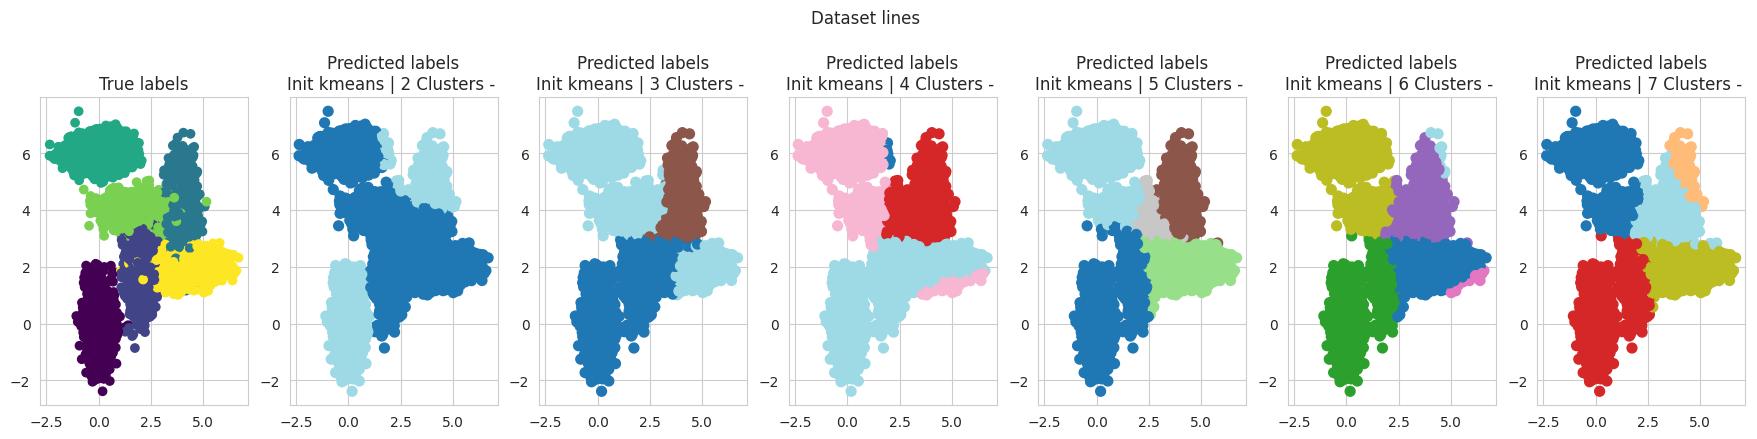

In [216]:
for dataset_name in train_predictions.keys():
    init_methods = list(train_predictions[dataset_name].keys())
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    feat0 = dataset["feature_0"]
    feat1 = dataset["feature_1"]
    n_groups = list(train_predictions[dataset_name][init_methods[0]].keys())
    for method in init_methods:
        fig, axs = plt.subplots(1, 1 + len(n_groups), figsize=(22,4))
        axs[0].scatter(feat0, feat1, c=train_gt[dataset_name], cmap='viridis')
        axs[0].set_title("True labels")
        for i, n_group in enumerate(n_groups, 1):
            axs[i].scatter(feat0, feat1, c=train_predictions[dataset_name][method][n_group]['y_pred'], s=50, cmap='tab20')
            axs[i].set_title(f"Predicted labels\nInit {method} | {n_group} Clusters - ")
        fig.suptitle(f'Dataset {dataset_name}', y=1.1)
        plt.show()


### Evaluating the results by 6 criteria

/tmp/ipykernel_1606784/3870555299.py:57: RuntimeWarning: overflow encountered in exp
  distances[k, i] = ((np.linalg.det(F[k]) ** (1/2)) / a_k) * np.exp(


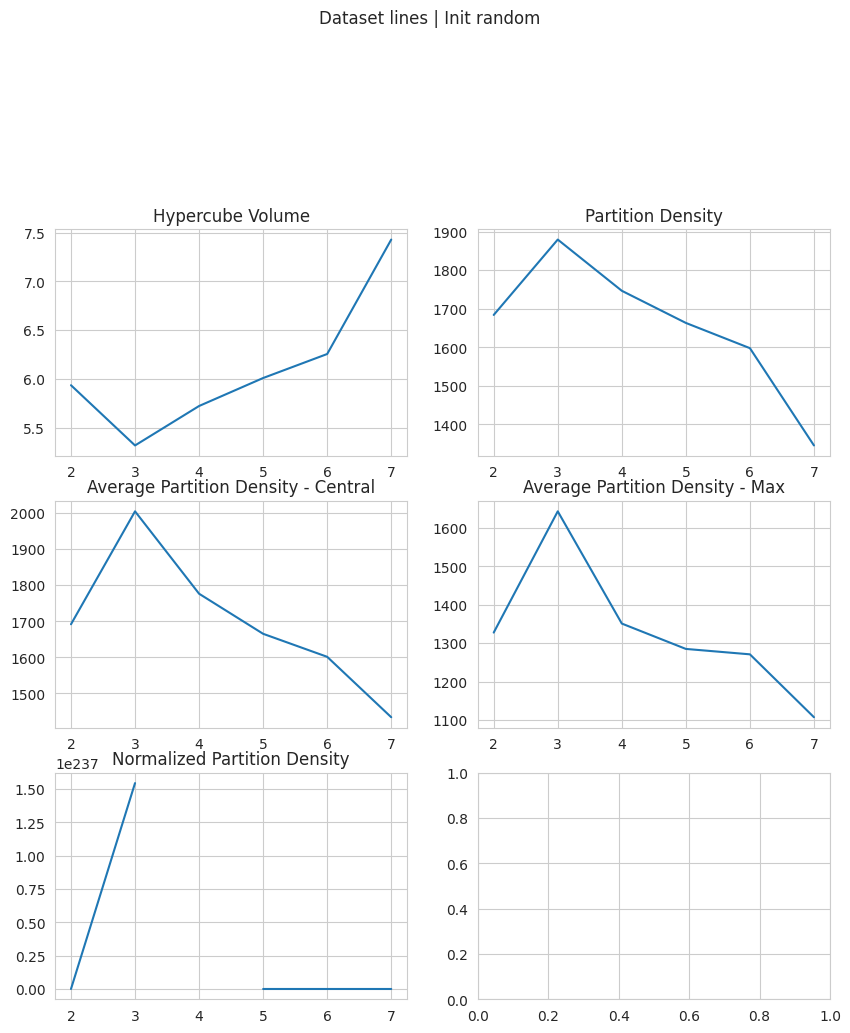

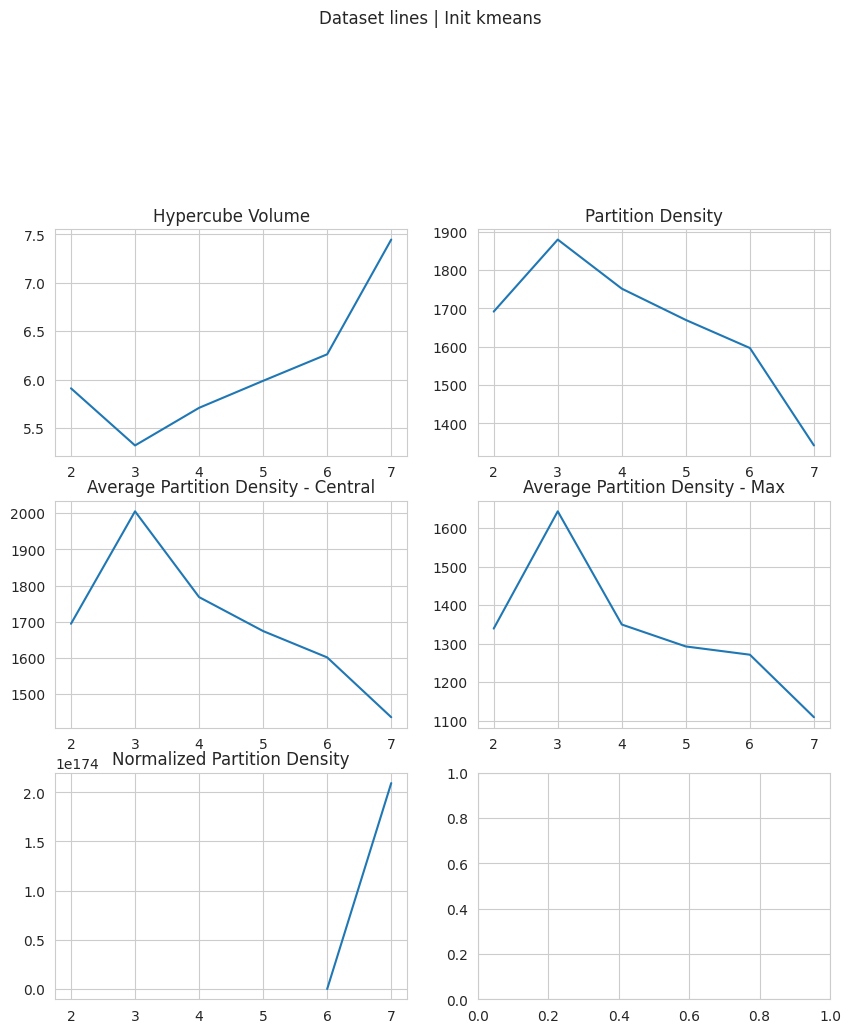

In [225]:
# for each dataset_name, init_method - plot the 6 criteria from uofc object for each n_groups as a line graph
for dataset_name in train_predictions.keys():
    init_methods = list(train_predictions[dataset_name].keys())
    dataset = pd.read_csv(f"dataset_{dataset_name}.csv")
    X = dataset[dataset.columns.drop('label')].values
    n_groups = list(train_predictions[dataset_name][init_methods[0]].keys())
    for method in init_methods:
        fig, axs = plt.subplots(3, 2, figsize=(10, 10))
        hvs = []
        pds = []
        apd_cs = []
        apd_ms = []
        norm_ps = []
        for k in n_groups:
            uofc = train_predictions[dataset_name][method][k]['model']
            hvs.append(uofc.fuzzy_hypercube_criteria(X))
            pds.append(uofc.partition_density_criteria(X))
            apd_cs.append(uofc.average_partition_density_central_criteria(X))
            apd_ms.append(uofc.average_partition_density_max_criteria(X))
            norm_ps.append(uofc.normalized_partition_criteria(X))
        # plot as a line
        axs[0, 0].set_title("Fuzzy Hypercube Volume")
        axs[0, 0].plot(n_groups, hvs, linestyle='-')
        axs[0, 1].set_title("Partition Density")
        axs[0, 1].plot(n_groups, pds, linestyle='-')
        axs[1, 0].set_title("Average Partition Density - Central")
        axs[1, 0].plot(n_groups, apd_cs, linestyle='-')
        axs[1, 1].set_title("Average Partition Density - Max")
        axs[1, 1].plot(n_groups, apd_ms, linestyle='-')
        axs[2, 0].set_title("Normalized Partition Density")
        axs[2, 0].plot(n_groups, norm_ps, linestyle='-')
        fig.suptitle(f'Dataset {dataset_name} | Init {method}', y=1.1)
        plt.show()

In [137]:
method = 'random'
dataset_name = 'random'
n_groups = 3

X = pd.read_csv(f"dataset_{dataset_name}.csv")
X = X[X.columns.drop('label')].values
y_pred = train_predictions[dataset_name][method][n_groups]['y_pred']
uofc = train_predictions[dataset_name][method][n_groups]['model']


In [200]:
# TESTS

uofc._F_calculate(X)
uofc._memberships(X)

F = uofc._F_calculate(X)
memberships = uofc._memberships(X)

# (memberships/ np.sqrt(np.linalg.det(F)).sum(axis=0)).mean(axis=0)
distances = uofc._distances(X)


In [212]:
(memberships ** 2 * distances.T).sum()

2.9094332622240625e+24